<a href="https://colab.research.google.com/github/LeTrajano/IA.CLASSIFICACAO/blob/main/Ol%C3%A1%2C_este_%C3%A9_o_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ATIVIDADE 04 - IA**
##Prática Individual de Classificação
BANCO DE DADOS: Análise e previsão de ataque cardíaco

DISCENTE: LETÍCIA TRAJANO ALVES

*   Item da lista
*   Item da lista



[lINK PARA O BANCO DE DADOS](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

In [1]:
# Importando Pandas: Para manipulação de dados
import pandas as pd

In [36]:
# Guardando os dados do CSV carregado em um Dataframe Pandas
dados = pd.read_csv('/content/heart.csv', sep=',')

In [37]:
# Mostrar quantidade de Linhas x Colunas (estrutura bidimensional da base de dados)
dados.shape

(303, 14)

# Mostrar base de dados
#dados.head()
dados.sample(5)

In [38]:
# Verificar tipos de variáveis
dados.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

# **Tratamento de dados:**

In [39]:
# mudar nome de colunas
dados = dados.rename(columns={
    'age': 'idade',
    'sex': 'sexo',
    'cp': 'dorTorax',
    'trtbps': 'PresAR',
    'chol': 'colesterol',
    'fbs': 'glicemiaJejum',
    'restecg': 'eletroRepouso',
    'thalachh': 'freqCardMax',
    'exng': 'anginaEx',
    'oldpeak': 'depST',
    'slp': 'inclST',
    'caa': 'numVasos',
    'thall': 'defeito',
    'output': 'resultado'
})


In [40]:
# Verificando novamente os tipos dos dados.
# Verificando a existencia de dados nulos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   idade          303 non-null    int64  
 1   sexo           303 non-null    int64  
 2   dorTorax       303 non-null    int64  
 3   PresAR         303 non-null    int64  
 4   colesterol     303 non-null    int64  
 5   glicemiaJejum  303 non-null    int64  
 6   eletroRepouso  303 non-null    int64  
 7   freqCardMax    303 non-null    int64  
 8   anginaEx       303 non-null    int64  
 9   depST          303 non-null    float64
 10  inclST         303 non-null    int64  
 11  numVasos       303 non-null    int64  
 12  defeito        303 non-null    int64  
 13  resultado      303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [41]:
# Mostrando o numero de dados faltantes em cada coluna (Tabela não possui dados faltantes)
dados.isnull().sum()

idade            0
sexo             0
dorTorax         0
PresAR           0
colesterol       0
glicemiaJejum    0
eletroRepouso    0
freqCardMax      0
anginaEx         0
depST            0
inclST           0
numVasos         0
defeito          0
resultado        0
dtype: int64

In [42]:
#Excluir todas as linhas com valores ausentes, onde axis = 0 (linhas) axis = 1 (colunas)
dados.dropna(axis=0, inplace=True)

In [44]:
# Mostrar algumas medidas estatisticas/descritivas da base de dados (Apenas dados numéricos)

dados[["dorTorax", "idade"]].describe()

,dorTorax,idade
count,303.000000,303.000000
mean,0.966997,54.366337
std,1.032052,9.082101
min,0.000000,29.000000
25%,0.000000,47.500000
50%,1.000000,55.000000
75%,2.000000,61.000000
max,3.000000,77.000000


In [45]:
# Importar matplotlib.
import matplotlib.pyplot as plt
# Importar seaborn.
import seaborn as sns

In [46]:
# Verifcando categorias ou classes
classes_diabetes = dados['resultado'].value_counts()

print(classes_diabetes)


resultado
1    165
0    138
Name: count, dtype: int64


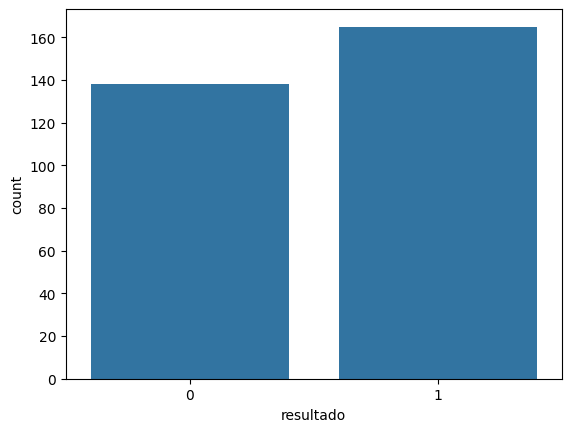

In [47]:
# Gráfico de barras com seaborn
sns.countplot(x='resultado', data=dados)
plt.show()

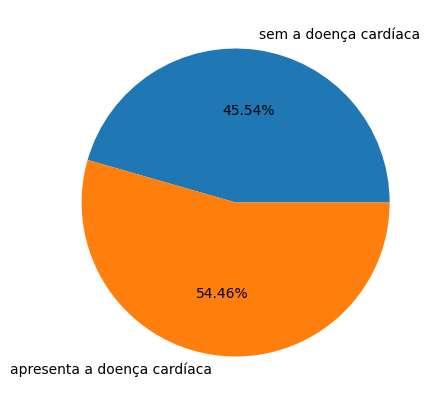

In [48]:
# Construindo o gráfico de fatias com matplotlib

nome_classes = ['sem a doença cardíaca', 'apresenta a doença cardíaca']
quantidade_classes = [138,165]
fig = plt.figure(figsize =(5, 5))
plt.pie(quantidade_classes, labels = nome_classes, autopct='%1.2f%%')
plt.show()

**Quais perguntas poderemos responder com esta base de dados?**


*   Quantas pessoas apresentam doença cardíaca (provavel de ter ataque cardíaco) ?
* Como os níveis de colesterol variam por idade e sexo?
* Existe uma correlação entre a pressão arterial e o nível de colesterol?
* Existe alguma associação entre dor no peito (tipo de dor torácica) e o risco de eventos cardíacos?
* Os pacientes com diabetes (baseando-se na glicemia de jejum) têm maior prevalência de doenças cardíacas?
*   Qual a relação entre a idade e ter doença cardíaca?
*   Dado um conjunto de características para um indivíduo como pressão arterial, nível glicêmico em jejum, idade... a pessoa tem risco de ter um ataque cadíaco ou não?




**Há variável resposta nessa base de dados?**

* Há variável resposta, variável "resposta", correspondendo ao pacente ter ou não a possibilidade de apresentar ataque cardíaco.

**Qual tipo de Aprendizagem de Máquina? Qual tarefa?**

* Aprendizagem supervisionada, classificação.

In [49]:
# Importanto técnicas de avaliação de modelos de classificação
from sklearn.model_selection import train_test_split  #método de  particionamento dos dados em treino e teste
from sklearn.metrics import accuracy_score    # método para calcular a taxa de acerto
import numpy as np

# Importando as técnicas de aprendizagem (Classificadores)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# **Aprendizado de Máquina Supervisionado: Classificação**

In [52]:

#base_nova = dados[['nome1','nome2','nome3','variavel saida']]

#Separação aleatória em conjuntos de treino e teste  (Treino = Para etapa de aprendizagem;  Teste = Para avaliar  o desempenho do modelo em novos dados)array = aprovacao_alunos.values
X = dados[['idade', 'sexo', 'PresAR', 'numVasos', 'defeito', 'glicemiaJejum', 'freqCardMax']]
Y = dados['resultado']



In [53]:
np.random.seed(7)
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.25) #consideramos treino 75% e teste 25%

In [54]:
# Treinando modelos
# Preparação do modelo 1 =  Árvore de Decisão
model1 = DecisionTreeClassifier()
model1.fit(X_treino, Y_treino)  #fit() é o método  para treinamento dos modelos

# Preparação do modelo 2 = SVM
model2 = SVC(kernel= "linear")
model2.fit(X_treino, Y_treino) #fit() é o método  para treinamento dos modelos


SVC(kernel='linear')

In [55]:
# Estimativas na base de teste (dados não vistos/futuros) = simulando o desempenho do modelo no mundo real
predictions1 = model1.predict(X_teste)  # predict retorna a resposta dada pelo modelo
print("Taxa de Acerto do modelo com Árvore de Decisão = ", round((accuracy_score(Y_teste, predictions1)*100),2),"%")

predictions2 = model2.predict(X_teste)
print("Taxa de Acerto do modelo com SVM = ", round((accuracy_score(Y_teste, predictions2)*100),2),"%")

Taxa de Acerto do modelo com Árvore de Decisão =  73.68 %
Taxa de Acerto do modelo com SVM =  77.63 %


## Implementação do melhor modelo no sistema = Objetivo = **Fazer Diagnóstico**

Imagina que um médico recebeu em seu consultório 2 novos pacientes, e com base nas sua ficha médica ele que realizar uma predição do risco do paciente desenvolver ataque cardíaco.

In [63]:
pacientes = {

    'idade': [37, 63],
    'sexo': [0, 1],
    'PresAR': [130, 145],
    'numVasos': [2, 3],
    'defeito': [2,1],
    'glicemiaJejum': [1, 0],
    'freqCardMax': [185, 151]

}

df_pacientes = pd.DataFrame(pacientes)

print(df_pacientes)



   idade  sexo  PresAR  numVasos  defeito  glicemiaJejum  freqCardMax
0     37     0     130         2        2              1          185
1     63     1     145         3        1              0          151


In [64]:
# Fazer previsões com o modelo 2 (SVM)
previsoes = model2.predict(df_pacientes)

# Iterar sobre as previsões e imprimir uma mensagem para cada paciente
for i, previsao in enumerate(previsoes):
  if previsao == 1:
    print(f'O paciente {i+1} possui alto risco de estar ou desenvolver ataque cardíaco.')
  else:
    print(f'O paciente {i+1} não possui alto risco de desenvolver ataque cardíaco.')


O paciente 1 possui alto risco de estar ou desenvolver ataque cardíaco.
O paciente 2 não possui alto risco de desenvolver ataque cardíaco.


In [65]:
#from sklearn.preprocessing import LabelEncoder
#dados.iloc[:, 1] = LabelEncoder().fit_transform(dados.iloc[:, 1])
#dados.head()